In [1]:
import os
import openai
from dotenv import load_dotenv
from pandas_market_agent.agent.agent import create_pandas_market_agent
from langchain_openai.chat_models import ChatOpenAI
from langchain.callbacks import StdOutCallbackHandler
import matplotlib.pyplot as plt

load_dotenv()

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
DB_HOST = os.getenv("POSTGRES_HOST", "localhost")
DB_PORT = os.getenv("POSTGRES_PORT", "5432")
DB_NAME = os.environ.get("POSTGRES_DB")
DB_USER = os.environ.get("POSTGRES_USER")
DB_PASSWORD = os.environ.get("POSTGRES_PASSWORD")

In [2]:
%matplotlib inline


In [3]:
openai.api_key = OPENAI_API_KEY


llm = ChatOpenAI(temperature=0, model="gpt-4", streaming=True)

agent_executor = create_pandas_market_agent(
    llm=llm,
    stocks=["CAT", "NKE", "XOM"],
)

2024-01-29 15:59:17,661 - INFO - REEEEEPLLLLLL!


/home/oleh/arkad/arkad-demo/arkad-pandas-demo/notebooks/.venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/oleh/arkad/arkad-demo/arkad-pandas-demo/notebooks/.venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/oleh/arkad/arkad-demo/arkad-pandas-demo/notebooks/.venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
2024-01-29 15:59:18,922 - INFO - Stocks data l



> Entering new AgentExecutor chain...


2024-01-29 16:00:47,760 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Invoking: `PandasTool` with `{'query': 'plot chart of NKE stock trading volume for last 5 dates'}`




2024-01-29 16:00:49,269 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"




> Entering new AgentExecutor chain...


2024-01-29 16:00:50,627 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-01-29 16:01:00,908 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-01-29 16:01:00,910 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


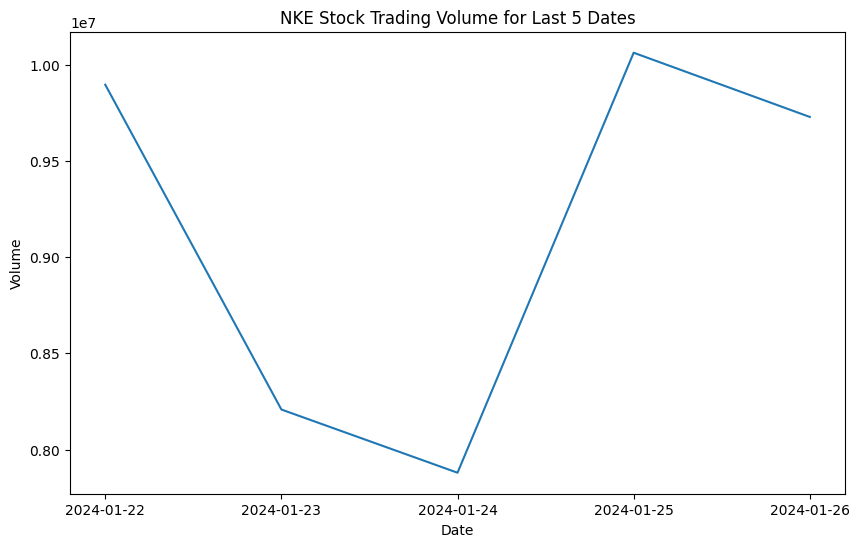

Thought: To plot the chart, I need to filter the dataframe for the symbol 'NKE' and then sort the data by date. After that, I can use the matplotlib library to plot the volume.
Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

# Filter for NKE
df_nke = df[df['Symbol'] == 'NKE']

# Sort by date
df_nke = df_nke.sort_values('Date')

# Plot the volume
plt.figure(figsize=(10,6))
plt.plot(df_nke['Date'].tail(5), df_nke['Volume'].tail(5))
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('NKE Stock Trading Volume for Last 5 Dates')
plt.show()
```

2024-01-29 16:01:01,686 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The code should have generated a line plot showing the trading volume of NKE stock for the last 5 dates. The x-axis represents the date and the y-axis represents the trading volume. The title of the plot is 'NKE Stock Trading Volume for Last 5 Dates'.
Final Answer: The plot has been successfully generated.

> Finished chain.
{'input': 'plot chart of NKE stock trading volume for last 5 dates', 'output': 'The plot has been successfully generated.'}

2024-01-29 16:01:08,035 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


I have successfully generated the plot chart of NKE stock trading volume for the last 5 dates.

> Finished chain.


In [5]:
response = agent_executor(
            {"input": "plot chart of NKE stock close price for last 5 dates you have in df", "chat_history": []},
            # callbacks=[StdOutCallbackHandler()],
)